<a href="http://www.cear.ufpb.br/pet">
    <img src="../images/logo_pet.png" width="150px" align="right">
</a>

<h1 align="center">
    <font color='blue' >
        Manipulando dados da COVID-19
    </font>
</h1>

<hr width="50%" align="center">

## **Arquivo:** [boletim_diario.csv](https://github.com/PETEletricaUFPB/intro_a_manipulacao_de_dados_com_python/blob/main/datasets/boletim_diario.csv)

In [56]:
import pandas as pd
import matplotlib.pyplot as plt

In [57]:
dados_covid = pd.read_csv('../datasets/boletim_diario.csv')

In [58]:
dados_covid.head()

,data,casosAcumulados,casosNovos,descartados,recuperados,obitosAcumulados,obitosNovos,Letalidade
0,2021-01-22,181773,1309,229721,138676,3955,16,0.0218
1,2021-01-21,180464,1111,229281,138673,3939,13,0.0218
2,2021-01-20,179353,1272,228228,138664,3926,14,0.0219
3,2021-01-19,178081,238,228046,133894,3912,10,0.0220
4,2021-01-18,177843,225,227850,133463,3902,14,0.0219


In [59]:
dados_covid['data'] = pd.to_datetime(dados_covid['data'])

In [60]:
dados_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 313 entries, 0 to 312
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   data              313 non-null    datetime64[ns]
 1   casosAcumulados   313 non-null    int64         
 2   casosNovos        313 non-null    int64         
 3   descartados       313 non-null    int64         
 4   recuperados       313 non-null    int64         
 5   obitosAcumulados  313 non-null    int64         
 6   obitosNovos       313 non-null    int64         
 7   Letalidade        313 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(6)
memory usage: 19.6 KB


In [61]:
dados_covid.tail()

,data,casosAcumulados,casosNovos,descartados,recuperados,obitosAcumulados,obitosNovos,Letalidade
308,2020-03-20,0,0,0,0,0,0,0.0
309,2020-03-19,0,0,0,0,0,0,0.0
310,2020-03-18,0,0,0,0,0,0,0.0
311,2020-03-17,0,0,0,0,0,0,0.0
312,2020-03-16,0,0,0,0,0,0,0.0


### **Vemos uma série temporal datada de 20/03/2020 a 22/01/2021.**

In [62]:
dados_covid.describe()

,casosAcumulados,casosNovos,descartados,recuperados,obitosAcumulados,obitosNovos,Letalidade
count,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000
mean,83940.022364,580.744409,108888.785942,59678.070288,1907.702875,12.635783,0.031785
std,60573.257636,500.482599,82722.447400,50526.573715,1359.833827,8.868064,0.027808
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,14859.000000,162.000000,13270.000000,2920.000000,379.000000,7.000000,0.022100
50%,98494.000000,523.000000,119323.000000,60655.000000,2223.000000,11.000000,0.023000
75%,134297.000000,838.000000,187718.000000,110029.000000,3138.000000,18.000000,0.023400
max,181773.000000,3333.000000,229721.000000,138676.000000,3955.000000,46.000000,0.145500


In [63]:
dados_covid['casosNovosMM'] = dados_covid.rolling(window=7)['casosNovos'].mean()

In [64]:
dados_covid['obitosNovosMM'] = dados_covid.rolling(window=14)['obitosNovos'].mean()

In [65]:
dados_covid.head(15)

,data,casosAcumulados,casosNovos,descartados,recuperados,obitosAcumulados,obitosNovos,Letalidade,casosNovosMM,obitosNovosMM
0,2021-01-22,181773,1309,229721,138676,3955,16,0.0218,NaN,NaN
1,2021-01-21,180464,1111,229281,138673,3939,13,0.0218,NaN,NaN
2,2021-01-20,179353,1272,228228,138664,3926,14,0.0219,NaN,NaN
3,2021-01-19,178081,238,228046,133894,3912,10,0.0220,NaN,NaN
4,2021-01-18,177843,225,227850,133463,3902,14,0.0219,NaN,NaN
5,2021-01-17,177618,783,227732,133270,3888,8,0.0219,NaN,NaN
6,2021-01-16,176835,838,226683,132838,3880,11,0.0219,825.142857,NaN
7,2021-01-15,175997,770,226001,132352,3869,12,0.0220,748.142857,NaN
8,2021-01-14,175227,1028,225417,132009,3857,12,0.0220,736.285714,NaN
9,2021-01-13,174199,681,224879,131239,3845,9,0.0221,651.857143,NaN


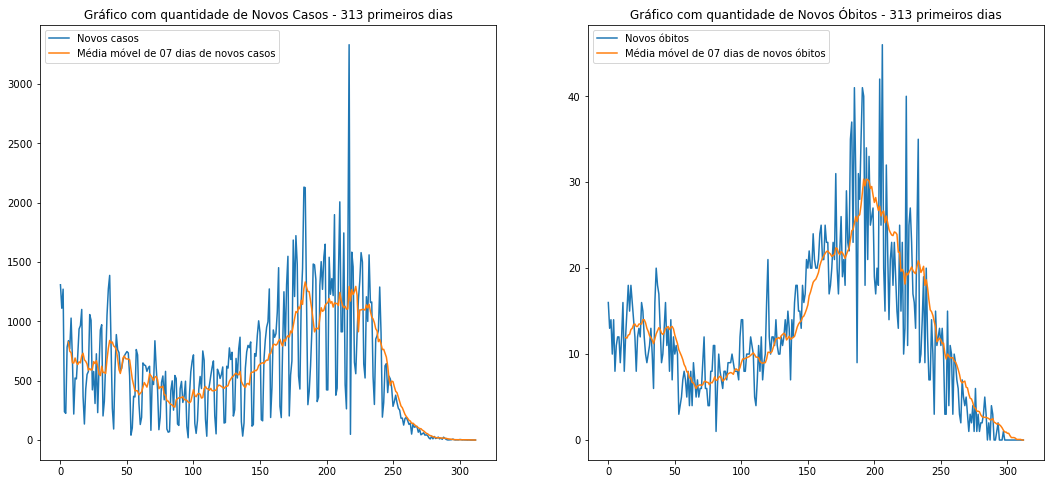

In [66]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(18,8))

ax1 = dados_covid.filter(items=['casosNovos', 'casosNovosMM']).plot(
    ax=ax1,
    title='Gráfico com quantidade de Novos Casos - 313 primeiros dias',
)
ax1.legend(['Novos casos', 'Média móvel de 07 dias de novos casos'])

ax2 = dados_covid.filter(items=['obitosNovos', 'obitosNovosMM']).plot(
    ax=ax2,
    title='Gráfico com quantidade de Novos Óbitos - 313 primeiros dias',
)
ax2.legend(['Novos óbitos', 'Média móvel de 07 dias de novos óbitos'])

In [67]:
df_semana_epidemiologica = dados_covid.resample('W', on='data')

In [68]:
df_semana_epidemiologica = df_semana_epidemiologica.mean()

In [69]:
del df_semana_epidemiologica['obitosNovosMM']
del df_semana_epidemiologica['casosNovosMM']

In [70]:
df_semana_epidemiologica.head()

,casosAcumulados,casosNovos,descartados,recuperados,obitosAcumulados,obitosNovos,Letalidade
data,,,,,,,
2020-03-22,0.285714,0.142857,5.714286,0.000000,0.000000,0.000000,0.000000
2020-03-29,7.857143,2.000000,215.000000,0.000000,0.000000,0.000000,0.000000
2020-04-05,26.571429,2.857143,459.142857,0.000000,1.571429,0.571429,0.045129
2020-04-12,72.571429,10.857143,736.285714,16.571429,9.000000,1.285714,0.121486
2020-04-19,190.571429,19.142857,961.571429,77.571429,25.142857,2.714286,0.132100


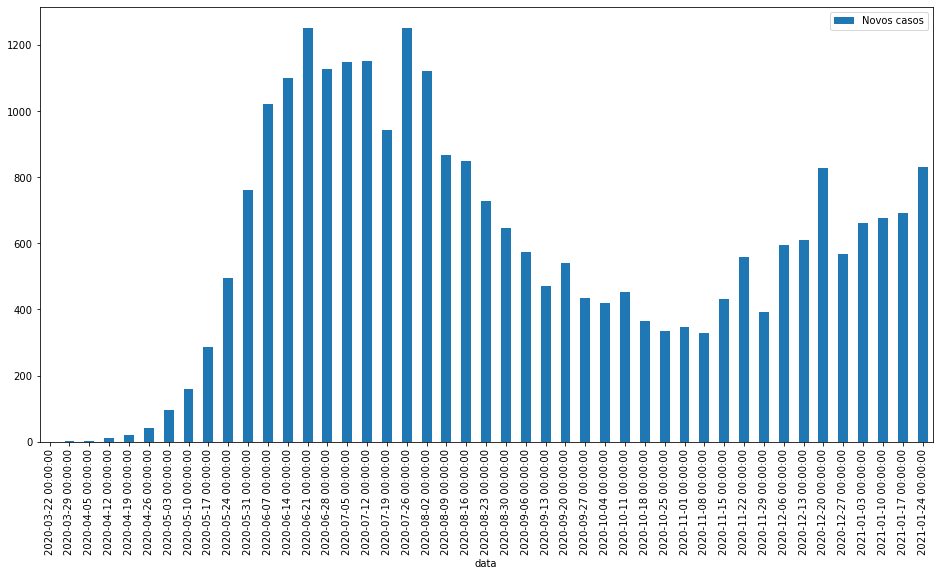

In [71]:
df_semana_epidemiologica [:100].plot.bar(
    y=['casosNovos'],
    figsize=(16,8),
)
plt.legend(["Novos casos"])

## **Arquivo:** [obitos.csv](https://github.com/PETEletricaUFPB/intro_a_manipulacao_de_dados_com_python/blob/main/datasets/obitos.csv)

In [184]:
obitos_covid = pd.read_csv('../datasets/obitos.csv')

In [185]:
obitos_covid.head()

,Data do Óbito,Sexo,Idade,Método,Inicio Sintomas,Município de Residência,Doenças preexistentes
0,2020-05-06,Masculino,50,Teste Rápido,2020-04-20,João Pessoa,"Diabetes Mellitus,Doença Hepática"
1,2020-06-12,Masculino,39,Swab,2020-06-03,Pedras de Fogo,Sem comorbidades
2,2020-06-23,Masculino,46,Teste Rápido,2020-06-21,Alhandra,"Diabetes Mellitus,Doença Renal,Doença Hepática"
3,2020-05-29,Masculino,68,Teste Rápido,2020-05-16,João Pessoa,"Hipertensão,Diabetes Mellitus,Doença Neurológica"
4,2020-06-04,Feminino,78,Teste Rápido,2020-05-25,Itapororoca,"Cardiopatia,Obesidade"


**Forma alternativa de abrir um _dataset_ da internet/github.**

In [186]:
obitos_covid_2 = pd.read_csv('https://raw.githubusercontent.com/PETEletricaUFPB/intro_a_manipulacao_de_dados_com_python/main/datasets/obitos.csv')

In [187]:
obitos_covid_2.head()

,Data do Óbito,Sexo,Idade,Método,Inicio Sintomas,Município de Residência,Doenças preexistentes
0,2020-05-06,Masculino,50,Teste Rápido,2020-04-20,João Pessoa,"Diabetes Mellitus,Doença Hepática"
1,2020-06-12,Masculino,39,Swab,2020-06-03,Pedras de Fogo,Sem comorbidades
2,2020-06-23,Masculino,46,Teste Rápido,2020-06-21,Alhandra,"Diabetes Mellitus,Doença Renal,Doença Hepática"
3,2020-05-29,Masculino,68,Teste Rápido,2020-05-16,João Pessoa,"Hipertensão,Diabetes Mellitus,Doença Neurológica"
4,2020-06-04,Feminino,78,Teste Rápido,2020-05-25,Itapororoca,"Cardiopatia,Obesidade"


In [188]:
obitos_covid.drop(columns=['Data do Óbito'],inplace=True)

In [189]:
# Agrupamento por sexo
obitos_por_sexo = obitos_covid.drop(columns=['Método','Inicio Sintomas','Município de Residência','Doenças preexistentes']).groupby(['Sexo']).count()
obitos_por_sexo.rename(columns={'Idade':'Quantidade de Óbito'},inplace=True)
obitos_por_sexo

,Quantidade de Óbito
Sexo,
Feminino,1775
Masculino,2180


In [190]:
# Agrupamento por idade
idade_obitos = obitos_covid.drop(columns=['Sexo','Inicio Sintomas','Município de Residência','Doenças preexistentes']).groupby(['Idade']).count()

In [191]:
idade_obitos

,Método
Idade,
05 meses,1
06 meses,1
1,1
1 ano,1
1 m,1
...,...
95,28
96,16
97,19


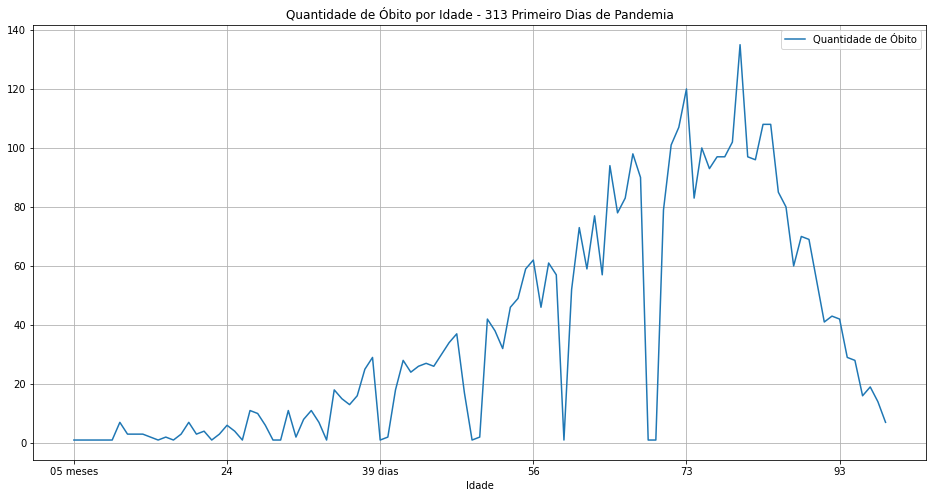

In [192]:
idade_obitos.rename(columns={'Método':'Quantidade de Óbito'},inplace=True)
idade_obitos.sort_values(by=['Quantidade de Óbito'])

idade_obitos.plot(
    title='Quantidade de Óbito por Idade - 313 Primeiro Dias de Pandemia',
   # ylabel='Quantidade',
   # xlabel='Idade',
    grid=True,
    figsize=(16,8)
)

In [193]:
# Agrupamento por cidade
cidades_obitos = obitos_covid.drop(columns=['Idade','Inicio Sintomas','Sexo','Doenças preexistentes']).groupby(['Município de Residência']).count()
cidades_obitos.rename(columns={'Método':'Quantidade de Óbito'},inplace=True)
cidades_obitos.T

Município de Residência,Aguiar,Alagoa Grande,Alagoa Nova,Alagoinha,Alcantil,Alhandra,Aparecida,Arara,Araruna,Araçagi,...,Umbuzeiro,Vieirópolis,Vista Serrana,Várzea,Zabelê,cajazeiras,casserengue,cubati,itabaiana,Água Branca
Quantidade de Óbito,1,30,11,16,1,19,8,9,15,7,...,4,2,3,1,1,2,1,1,1,8


In [194]:
cidades_obitos.rename(columns={'Método':'Quantidade de Óbito'},inplace=True)
cidades_obitos.sort_values(by=['Quantidade de Óbito'],inplace=True,ascending=False)
cidades_com_mais_obitos=cidades_obitos[:10]

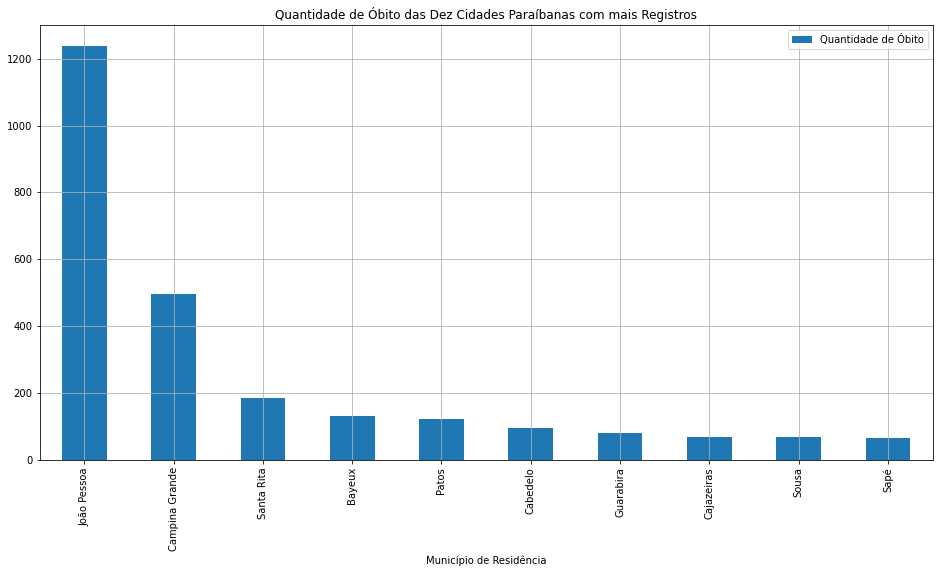

In [195]:
cidades_com_mais_obitos.plot.bar(
    title='Quantidade de Óbito das Dez Cidades Paraíbanas com mais Registros',
    #ylabel='Quantidade',
    #xlabel='Cidade',
    grid=True,
    figsize=(16,8)
)

**Doenças Pré-Existenes**

In [196]:
doencas = obitos_covid['Doenças preexistentes'].unique()
doencas = doencas[:10]

In [197]:
doencas

array(['Diabetes Mellitus,Doença Hepática', 'Sem comorbidades',
       'Diabetes Mellitus,Doença Renal,Doença Hepática',
       'Hipertensão,Diabetes Mellitus,Doença Neurológica',
       'Cardiopatia,Obesidade', 'Hipertensão,Diabetes Mellitus',
       'Diabetes Mellitus,Doença Respiratória', 'Imunossupressão',
       'Obesidade', 'Cardiopatia'], dtype=object)

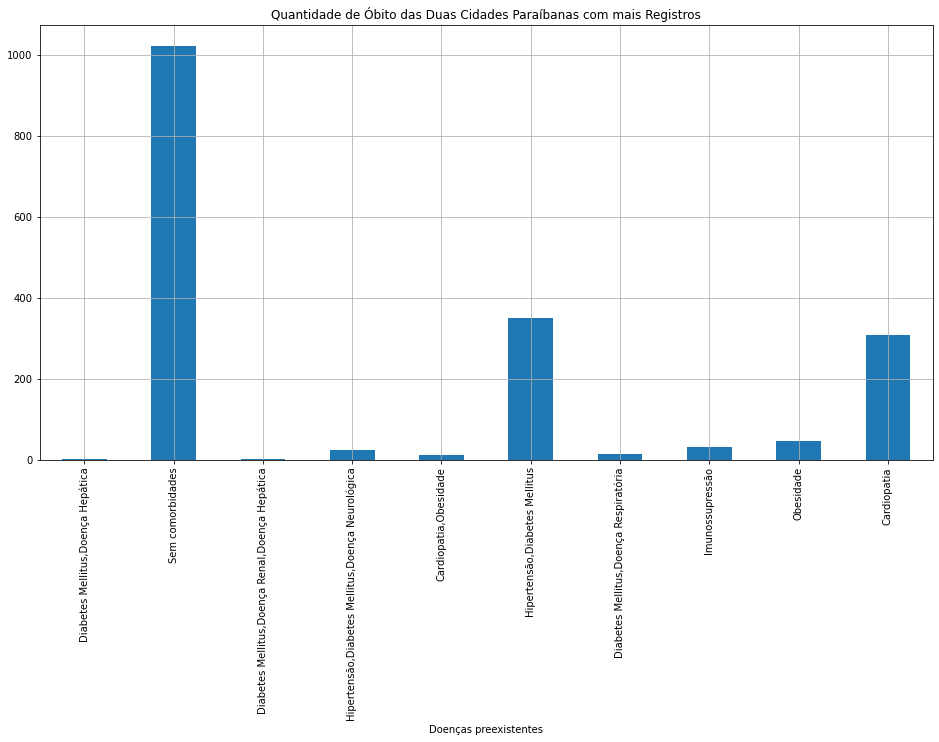

In [198]:
doencas_obitos = obitos_covid.groupby(['Doenças preexistentes']).count()

doencas_obitos.loc[doencas,'Idade'].plot.bar(
    title='Quantidade de Óbito das Duas Cidades Paraíbanas com mais Registros',
    #ylabel='Quantidade',
    #xlabel='Doença',
    grid=True,
    figsize=(16,8)
)

**Aplicação de Testes Swab e Testes Rápidos**

In [199]:
obitos_covid.query('Método == "Swab"')

,Sexo,Idade,Método,Inicio Sintomas,Município de Residência,Doenças preexistentes
1,Masculino,39,Swab,2020-06-03,Pedras de Fogo,Sem comorbidades
5,Feminino,82,Swab,2020-05-15,Pitimbu,"Hipertensão,Diabetes Mellitus"
6,Masculino,86,Swab,2020-05-05,Campina Grande,Sem comorbidades
7,Feminino,42,Swab,2020-05-04,Areial,"Diabetes Mellitus,Doença Respiratória"
8,Masculino,42,Swab,2020-04-07,João Pessoa,Imunossupressão
...,...,...,...,...,...,...
3949,Masculino,87,Swab,2021-01-09,Tavares,"Hipertensão,Doença Respiratória,Doença Hematol..."
3950,Feminino,71,Swab,2020-12-10,Campina Grande,Sem comorbidades
3951,Feminino,67,Swab,2021-01-04,Campina Grande,Sem comorbidades
3952,Masculino,74,Swab,2021-01-01,João Pessoa,Sem comorbidades


In [200]:
obitos_covid.query('Método == "Teste Rápido" and Sexo == "Feminino"')

,Sexo,Idade,Método,Inicio Sintomas,Município de Residência,Doenças preexistentes
4,Feminino,78,Teste Rápido,2020-05-25,Itapororoca,"Cardiopatia,Obesidade"
34,Feminino,80,Teste Rápido,2020-06-05,João Pessoa,Sem comorbidades
38,Feminino,91,Teste Rápido,2020-06-02,Santa Rita,Hipertensão
40,Feminino,55,Teste Rápido,2020-05-16,Cajazeiras,"Doença Neurológica,Neoplasia"
41,Feminino,66,Teste Rápido,2020-05-30,João Pessoa,Sem comorbidades
...,...,...,...,...,...,...
3922,Feminino,84,Teste Rápido,2021-01-06,Monteiro,Sem comorbidades
3924,Feminino,85,Teste Rápido,2021-01-03,Campina Grande,"Diabetes Mellitus,Cardiopatia"
3938,Feminino,68,Teste Rápido,2021-01-06,Bayeux,Neoplasia
3943,Feminino,56,Teste Rápido,2021-01-10,Sousa,Sem comorbidades


array([<matplotlib.axes._subplots.AxesSubplot object at 0x17291DB0>],
      dtype=object)

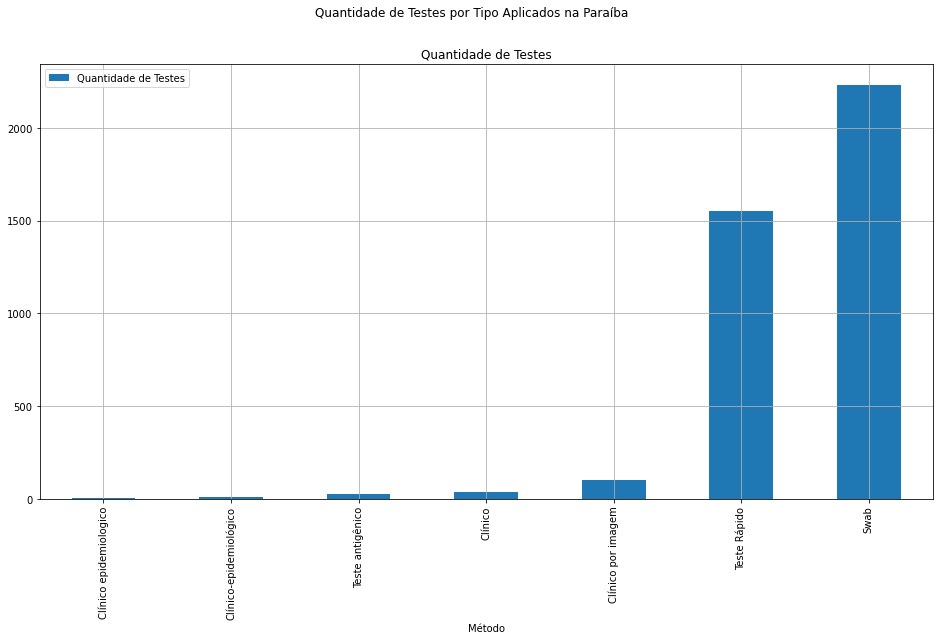

In [201]:
testes_covid = obitos_covid.drop(columns=['Sexo','Inicio Sintomas','Município de Residência','Doenças preexistentes']).groupby(['Método']).count()

testes_covid.rename(columns={'Idade':'Quantidade de Testes'},inplace=True)
testes_covid.sort_values(by=['Quantidade de Testes'],inplace=True)

testes_covid.plot.bar(
    title='Quantidade de Testes por Tipo Aplicados na Paraíba',
    #ylabel='Quantidade',
    #xlabel='Tipo de Teste',
    subplots=True,
    grid=True,
    figsize=(16,8)
)

In [202]:
obitos_covid.replace('Clínico epidemiologico', 'Clínico-epidemiológico', inplace=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x172DC9F0>],
      dtype=object)

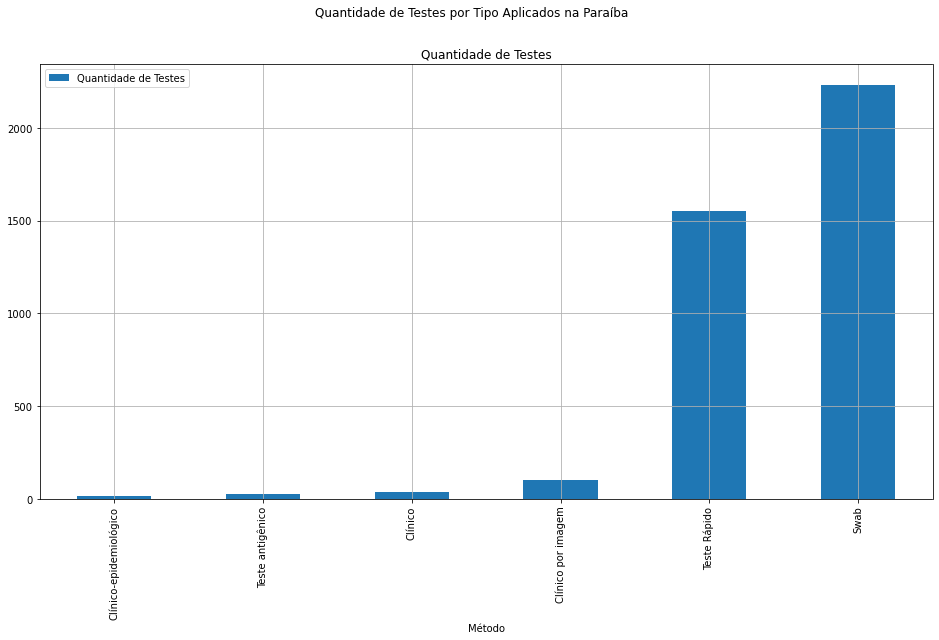

In [203]:
testes_covid = obitos_covid.drop(columns=['Sexo','Inicio Sintomas','Município de Residência','Doenças preexistentes']).groupby(['Método']).count()

testes_covid.rename(columns={'Idade':'Quantidade de Testes'},inplace=True)
testes_covid.sort_values(by=['Quantidade de Testes'],inplace=True)

testes_covid.plot.bar(
    title='Quantidade de Testes por Tipo Aplicados na Paraíba',
    #ylabel='Quantidade',
    #xlabel='Tipo de Teste',
    subplots=True,
    grid=True,
    figsize=(16,8)
)